<a href="https://colab.research.google.com/github/waadshaher/image-classification/blob/flowers/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model To Recognize And Classify Flowers Into Their Appropriate Classes.


*Names: Waad, syabil, tazin*

In [ ]:
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

## Load the Data From Flowers Dataset

Download the flowers dataset then place it into a directory variable. Here, the training set is downloaded.

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

## Preprocess the Loaded Data

Convinence variables are also created (`IMAGE_SIZE`,`BATCH_SIZE`), these would be used in the next step.

`ImageDataGenerator` class is used for the purpose of rescaling the input images from both training and validation splits, in this way, new images are created, or generated, that would be used as inputs too. For flowers dataset, the parameter `validation_split` is set to 0.2, in which 20% of the total images from the training set is saved for validation.

The value from the class is saved to the variable `image_generator`.

The train generator is created and as parameters listed: the train dataset directory, image size, batch size, target size, and shuffle. Shuffle is set to true because during training, we would want the training images to be shuffled at each iteration.

`flow_from_directory()` method is used, this is to use the `ImageDataGenerator` class using the variables created in the previous step.


Validation generator is created with almost the same approach, the difference here, shuffle is set to false, since there is no need to shuffle the images during validation.

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_data_gen = image_generator.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = image_generator.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


##Creating the Base Model from Google's MobileNetV2

`IMAGE_SHAPE` is created as a convenience variable as well, taking in the unified `IMAGE_SIZE` for all images. 3 in the parameter is explained because simply computers interpret colored images as 3D arrays, 3 representing width, height, and depth.

Next the base model is created **MobileNet V2** model. It takes the following parameters: `input_shape`, `include_top`, `weights`.

*  `input_shape`: simply takes the unified sizes of the input images as input. Images need to be resized to one unified size since our NN requires a fixed size of inputs. 

*  `include_top`: is set to false because since we need the base model to work as a feature exractor, therefore the parameter is set to false so it does not include the model's classification layers at the top.

*  `weights`: using the ImageNet weights.


In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

##Modifying V2 Model

### Set Feature Extraction Method From V2's Model

To be able to use the above model as a feature extractor only, it is set to `False`

In [ ]:
base_model.trainable = False

### Add the Convolutional Layer

After the base model has been set to false, a custom classifier can be added using `tf.keras.Sequential`.

First the base model is added. A convolutional layer is added with activation function relu.

Dropout is also performed to avoid overfitting, set to probability of 0.2, or 20%, that each neuron gets dropped.

A pooling layer is added using `GlobalAveragePooling2D()` to perform pooling.

Finally, a fully connected layer is added with 5 units (corresponding to 5 classes of the dataset) with softmax activation function.


In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

## Compile the Model

Before the model is trained, it must be compiled using the following `compile()` method. The parameters listed: 

*   `optimizer`: Using `Adam()` optimizer with default learning rate of 0.001
*   `loss`: Using a categorical cross-entropy loss, since there are several classes.
*   `metrics`: Since we would want to see the training and validation accuracies, the metrics is set to accuracy.



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

We can check the model's layers along with their information using `summary()` method.

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 2,626,821
Trainable params: 368,837
Non-trainable params: 2,257,984
_________________________________________________________________


## Train the Model

With 100 epochs set, and using the previous generators created earlier, the model can now be finally trained.

In [ ]:
epochs = 100

history = model.fit(train_data_gen, 
                    steps_per_epoch=len(train_data_gen), 
                    epochs=epochs, 
                    validation_data=val_data_gen, 
                    validation_steps=len(val_data_gen))

Epoch 1/100
46/46 [==============================] - 15s 319ms/step - loss: 0.9821 - accuracy: 0.7081 - val_loss: 0.4905 - val_accuracy: 0.8276
Epoch 2/100
46/46 [==============================] - 13s 288ms/step - loss: 0.3313 - accuracy: 0.8847 - val_loss: 0.4234 - val_accuracy: 0.8399
Epoch 3/100
46/46 [==============================] - 13s 290ms/step - loss: 0.2314 - accuracy: 0.9160 - val_loss: 0.4006 - val_accuracy: 0.8632
Epoch 4/100
46/46 [==============================] - 13s 288ms/step - loss: 0.1453 - accuracy: 0.9547 - val_loss: 0.4105 - val_accuracy: 0.8618
Epoch 5/100
46/46 [==============================] - 13s 282ms/step - loss: 0.1007 - accuracy: 0.9752 - val_loss: 0.4615 - val_accuracy: 0.8550
Epoch 6/100
46/46 [==============================] - 13s 284ms/step - loss: 0.0793 - accuracy: 0.9786 - val_loss: 0.4402 - val_accuracy: 0.8700
Epoch 7/100
46/46 [==============================] - 13s 286ms/step - loss: 0.0524 - accuracy: 0.9898 - val_loss: 0.4657 - val_accuracy:

## Plotting the Results

 We can plot the results using `matplotlib`'s help. Here we can specify what we want to translate the results from the previous step into graphs.

In the following 2 graphs, we can see the training and validation accuracies, as well as the training and validation losses. 

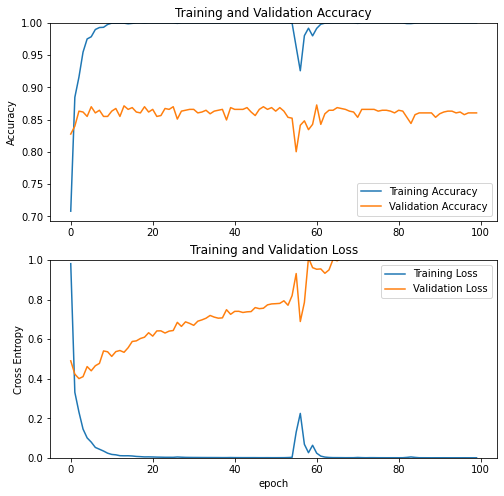

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()